# Andrew Hwang / Week1 Homework / Sep. 13. 24

### Homework Task 1 (Boston311) 
!!!Please unhide cells below!!!

Report the number of neighborhoods mentioned in the dataset (unique distinct names in "neighborhood" column), and visualize the number of complaints by neighborhood as a bar plot, similar to the one above

In [43]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
# Data url
url = 'https://data.boston.gov/dataset/8048697b-ad64-4bfc-b090-ee00169f2323/resource/6ff6a6fd-3141-4440-a880-6f60a37fe789/download/tmpcv_10m2s.csv'

In [47]:
# Read CSV file from url
boston311 = pd.read_csv(url)

/var/folders/5h/1y1pgqkj59ndm5pn7srvhkyh0000gn/T/ipykernel_93862/1363629387.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  boston311 = pd.read_csv(url)


In [48]:
# Check columns
boston311.columns 

Index(['case_enquiry_id', 'open_dt', 'sla_target_dt', 'closed_dt', 'on_time',
       'case_status', 'closure_reason', 'case_title', 'subject', 'reason',
       'type', 'queue', 'department', 'submitted_photo', 'closed_photo',
       'location', 'fire_district', 'pwd_district', 'city_council_district',
       'police_district', 'neighborhood', 'neighborhood_services_district',
       'ward', 'precinct', 'location_street_name', 'location_zipcode',
       'latitude', 'longitude', 'geom_4326', 'source'],
      dtype='object')

In [49]:
# The number of neighborhoods mentioned in the dataset
boston311['neighborhood'].nunique()

24

In [50]:
# The number of complaints by neighborhood in table
boston311[['neighborhood','case_enquiry_id']].groupby(by=['neighborhood']).count().sort_values(by='case_enquiry_id', ascending= False)

,case_enquiry_id
neighborhood,
Dorchester,38680
Roxbury,23813
South Boston / South Boston Waterfront,19966
Allston / Brighton,17744
East Boston,16679
South End,16674
Jamaica Plain,13609
Hyde Park,13024
Downtown / Financial District,12569


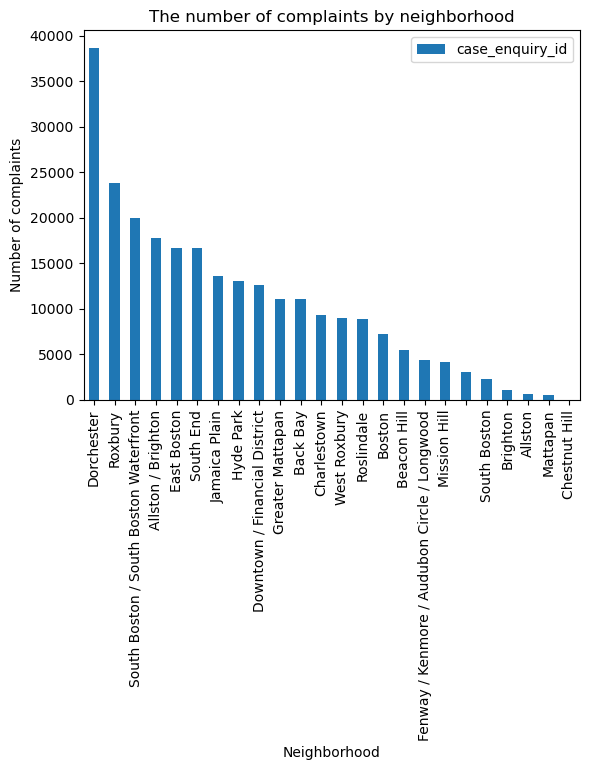

In [51]:
# Visualize
boston311[['neighborhood','case_enquiry_id']].groupby(by=['neighborhood']).count().sort_values(by='case_enquiry_id', ascending= False).plot.bar()

plt.title('The number of complaints by neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of complaints')

plt.show()

### Homework Task 2 (Real-estate sales)
!!!Please unhide cells below!!!


Quantify the average price per square foot per zip code (include only the records higher than zero price and footage). Visualize the result as a bar plot. Which zip codes are the three most expensive ones?

Hints: First, use "group_by" to create an aggregate with cumulative price and sq foot size and then add a new field through assignment dividing one by the other. 

You can use sort_values to order dataframe by price per zip code and see the top three zip codes.

Not mandatory, but if you want python to give you a specific list of the top three zip codes, you can use .iloc to slice it and get the index converting it to a list. But then make sure to ignore zip codes with infinite prices (likely due to zero house sizes).

In [83]:
# Select filename
year=2015; boro='brooklyn'
fname=str(year)+'_'+boro+'.xls'

In [91]:
# Set Url
url = 'https://www1.nyc.gov/assets/finance/downloads/pdf/rolling_sales/annualized-sales/'+str(year)+\
                                                                                       '/'+fname

In [97]:
# Read excel and skip beginning four rows
re_sales = pd.read_excel(url, skiprows = 4)

In [98]:
# Check head
re_sales.head()

,BOROUGH\n,NEIGHBORHOOD\n,BUILDING CLASS CATEGORY\n,TAX CLASS AT PRESENT\n,BLOCK\n,LOT\n,EASE-MENT\n,BUILDING CLASS AT PRESENT\n,ADDRESS\n,APARTMENT NUMBER\n,...,RESIDENTIAL UNITS\n,COMMERCIAL UNITS\n,TOTAL UNITS\n,LAND SQUARE FEET\n,GROSS SQUARE FEET\n,YEAR BUILT\n,TAX CLASS AT TIME OF SALE\n,BUILDING CLASS AT TIME OF SALE\n,SALE PRICE\n,SALE DATE\n
0,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,22,,A5,8647 15TH AVENUE,,...,1,0,1,1547,1428,1930,1,A5,758000,2015-03-31
1,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6361,17,,A5,55 BAY 10TH STREET,,...,1,0,1,1933,1660,1930,1,A5,778000,2015-06-15
2,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6371,60,,A9,8620 19TH AVENUE,,...,1,0,1,2417,2106,1930,1,A9,0,2015-09-16
3,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6372,48,,S1,1906 86TH STREET,,...,1,1,2,1900,2090,1931,1,S1,1365000,2015-05-29
4,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6373,73,,A1,50 BAY 23RD STREET,,...,1,0,1,2417,1672,1930,1,A1,750000,2015-12-17


In [289]:
# Calculate cumulative price by zip code
price_sum = re_sales[['ZIP CODE\n','SALE PRICE\n']][re_sales['SALE PRICE\n']>0].groupby(by=['ZIP CODE\n']).sum().reset_index()

# Calculate cumulative gross sq foot by zip code
gsf_sum = re_sales[['ZIP CODE\n','GROSS SQUARE FEET\n']][re_sales['GROSS SQUARE FEET\n']>0].groupby(by=['ZIP CODE\n']).sum().reset_index()

# Create merged table using zip code as key
merged_table = pd.merge(price_sum, gsf_sum, on='ZIP CODE\n').sort_values(by='SALE PRICE\n', ascending = False)

# Calculate price per Gross Square Feet (GSF)
merged_table['price_per_gsf'] = merged_table['SALE PRICE\n'] / merged_table['GROSS SQUARE FEET\n']

# Sort table by highest price per GSF
sorted_table = merged_table.sort_values(by='price_per_gsf', ascending= False)

sorted_table

,ZIP CODE\n,SALE PRICE\n,GROSS SQUARE FEET\n,price_per_gsf
37,11249,989082814,1100543,898.722552
0,11201,1986984263,2634291,754.276677
13,11215,1202527889,2004753,599.838428
15,11217,816082437,1391185,586.609572
20,11222,577787347,1359457,425.013330
29,11231,612548434,1492092,410.529936
9,11211,891907730,2222272,401.349488
36,11238,914549280,2606097,350.926800
4,11206,657478647,1905171,345.102170
16,11218,476981418,1563861,305.002438


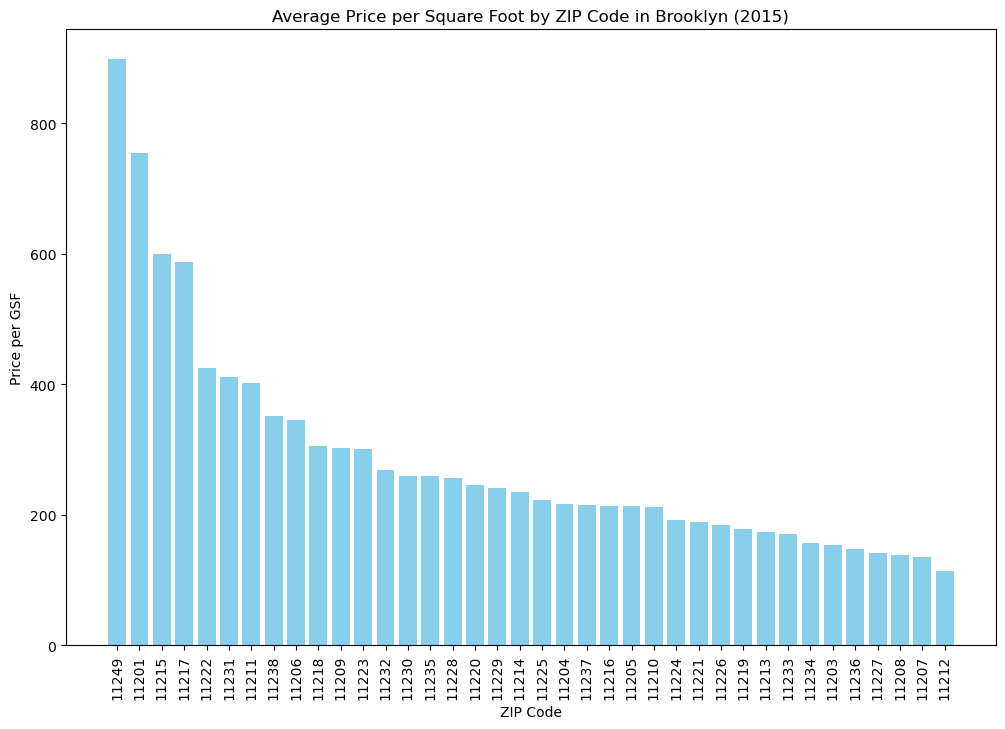

,ZIP CODE\n,price_per_gsf
37,11249,898.722552
0,11201,754.276677
13,11215,599.838428


In [291]:
# Plot the bar graph
plt.figure(figsize=(12, 8))
plt.bar(range(len(sorted_table)), sorted_table['price_per_gsf'], color='skyblue')

# Label x-axis with zip code
plt.xticks(range(len(sorted_table)), sorted_table['ZIP CODE\n'], rotation=90)

plt.xlabel('ZIP Code')
plt.ylabel('Price per GSF')
plt.title(f'Average Price per Square Foot by ZIP Code in Brooklyn ({year})')

plt.show()

# Display the top 3 most expensive ZIP codes
top_3_expensive = sorted_table.head(3)[['ZIP CODE\n', 'price_per_gsf']]
top_3_expensive


### Homework Task 3 (COVID-19 Data)
!!!Please unhide cells below!!!